In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

def predict(row):
    res = 1
    if 400<abs(row["X9"])<500 and row["X15"]==0:
        res *= 0.3
    if 400<abs(row["X9"])<500 and row["X18"]==898:
        res *= 0.3
    if row["X9"]>0 and row["X18"]<0:
        res *= 0.3
    if 1100<row["X17"]<1500 and row["X26"]==1:
        res *= 0.3
    if row["X9"]>0 and row["X12"]>0:
        res *= 0.3
    if row["X17"]>1500 and row["X16"]>60:
        res *= 0.3
    if row["X12"]>2 and row["X26"]<1:
        res *= 0.3
    if 0<row["X14"]<500 and row["X15"]==0:
        res *= 0.3
    if 0<row["X22"]:
        res *= 0.3
    return 1-res


table = pd.read_csv("table.csv", sep = ";")
le = LabelEncoder()
table["X22"].replace(np.nan, 0.0, inplace=True)
table.replace(np.nan, "nul", inplace=True)
le.fit(table.EVENT_TYPE_EX)
table["EVENT_TYPE_EX"] = le.transform(table.EVENT_TYPE_EX)
le.fit(table.X11)
table["X11"] = le.transform(table.X11)
le.fit(table.X12)
table["X12"] = le.transform(table.X12)
le.fit(table.X16)
table["X16"] = le.transform(table.X16)
le.fit(table.X24)
table["X24"] = le.transform(table.X24)
le.fit(table.X26)
table["X26"] = le.transform(table.X26)

table["p0_Fraud"] = table.apply(lambda row: predict(row), axis=1)
print(table["p0_Fraud"].unique())

[0.7    0.91   0.     0.973  0.9919]


In [15]:
def falsepos(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]=="G"):
            c1+=1
            if (table[rule][i]>=percent):
                c2+=1
    print("fp: "+str(c2/c1))

def falseneg(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]!="G"):
            c1+=1
            if (table[rule][i]<=percent):
                c2+=1
    print("fn: "+str(c2/c1))

def recall(rule,percent):
    fsfr=fslr=lsfr=0
    q=len(table[rule])
    for i in range(q):
        if (table[rule][i]>=percent):
            if (table["CLASS"][i]!="G"):
                fsfr+=1
            else:
                fslr+=1
        else:
            if (table["CLASS"][i]!="G"):
                lsfr+=1
    print("recall: "+str(fsfr/(fsfr+q*lsfr)))
    print("precicion: "+str(fsfr/(fsfr+q*fslr)))

for p in range(0,1):
    rule="p"+str(p)+"_Fraud"
    print(rule+":")
    falsepos(rule,0.5)
    falseneg(rule,0.5)
    recall(rule,0.5)
    
#fp<=0.2 if:
#r1=0.69
#r2=0.79
#r3=0.54
#r4=0.53
#r5=0.99

p0_Fraud:
fp: 0.9884438402007948
fn: 0.024950884086444008
recall: 0.0013317873186905603
precicion: 1.791879697291405e-05


0.0751435858382572
0.18019930148268126
0.39273492278822086
0.04634057329536834


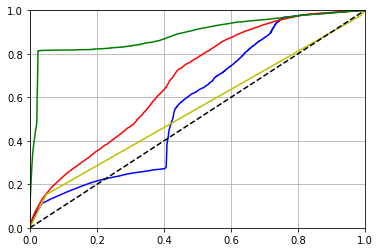

In [16]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y = np.array(table["CLASS"])
x1 = np.array(table["p1_Fraud"])
x2 = np.array(table["p2_Fraud"])
x3 = np.array(table["p3_Fraud"])
x0 = np.array(table["p0_Fraud"])
fpr, tpr, thresholds = roc_curve(y,x1,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'b')
fpr, tpr, thresholds = roc_curve(y,x2,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'r')
fpr, tpr, thresholds = roc_curve(y,x3,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'g')
fpr, tpr, thresholds = roc_curve(y,x0,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'y')
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()